# Plot of the simulation execution time on the A30 and A40 Nvidia Boards

Here we tested the execution time of the whole code for the vollowing cofiguration.

## Data sample

- Data sample : AMS-02_PRL2019
- Ion : He3
- Starting date: 19/05/2011 
- End date : 15/11/2017
- (r, $\theta$, $\phi$) : (1, 0, 0)
- Reference : DOI: https://dx.doi.org/10.1103/PhysRevLett.123.181102

## Computation configuration

Too speed up the simulation and remove all incidental operations of the code, we simulate only one bin of energy:
|Rigidity    |Flux        |ErrInf      |ErrSup     |
|------------|------------|------------|-----------|
|1.25000e+01 |2.44600e-01 |6.35059e-03 |6.35059e-03|


## GPU hardware and capabilities description

### NVIDIA A30
- Compute capability:  8.0
- Clock rate:  1440000
- Total global mem:  25229983744
- Total constant Mem:  65536
- Max mem pitch:  2147483647
- Texture Alignment:  512
- Multiprocessor count:  56
- Shared mem per mp:  49152
- Registers per mp:  65536
- Threads in warp:  32
- Warps per Multiprocessor:  64
- Threads per Multiprocessor:  2048
- Thread Blocks per Multiprocessor:  32
- Max threads per block:  1024

### NVIDIA A40
- Compute capability:  8.6
- Clock rate:  1740000
- Total global mem:  47619112960
- Total constant Mem:  65536
- Max mem pitch:  2147483647
- Texture Alignment:  512
- Multiprocessor count:  84
- Shared mem per mp:  49152
- Registers per mp:  65536
- Threads in warp:  32
- Warps per Multiprocessor:  48
- Threads per Multiprocessor:  1536
- Thread Blocks per Multiprocessor:  16
- Max threads per block:  1024

## Simulation launch configuration

- The number of 5000 particles is rounded to 5632 to fit the warpsize
- The number of warps per block was varied from 2 to 32 for each GPU board (only the avilable values of warps per block are taken into account)
- The number of blocks is computed by rounding the $\frac{Npart}{WpB*WarpSize}$ ratio
- The number of threads per block is computed by rounding the $\frac{Npart}{Nblocks}$ ratio

### Execution example
propagation Kernel
- Max Number of Warp in a Block   : 2
- Number of blocks                : 88 
- Number of threadsPerBlock       : 64 

Histogram Kernel
- Number of Warp in a Block       : 1024 
- Number of blocks                : 6 
- Number of threadsPerBlock       : 939 

Energy: 7.45 GeV 
- EMin = 7.454 Emax = 9.814 
- N Output binning: 33 
- Time to back-propagate particles:
    - Init              :  0.06 ms 
    - propagation phase :  3911.77 ms 
    - Find Max          :  0.33 ms 
    - Binning           :  0.15 ms 
- Time to Set Memory:  12.0 ms 
- Time to create Rnd:  12.1 ms (delta = 0.1)
- Time to execute   :  3924.4 ms (delta = 3912.4)

## Plot of the execution time with best warps per block for test isotopes

### Isotope List

In [1]:
# ---- Isotopes List ------------
Isotopes_dict ={              #  Z    A   T0[GeV/n]      Name  
                "Electron":  [( -1.,  1., 5.109989e-04,"Electron"  )],
                "Antiproton":[( -1.,  1., 0.938272    ,"Antiproton")],
                "Positron":  [(  1.,  1., 5.109989e-04,"Positron"  )],
                "Proton":    [(  1.,  1., 0.938272    ,"Proton"    ),
                              (  1.,  2., 0.938272    ,"Deuteron"  )],
                "H1":        [(  1.,  1., 0.938272    ,"H1"        )],
                "H2":        [(  1.,  2., 0.938272    ,"H2"        )],
                "Helium":    [(  2.,  4., 0.931494061 ,"Helium"    ),
                              (  2.,  3., 0.931494061 ,"Heli3"     )],
                "He4":       [(  2.,  4., 0.931494061 ,"He4"       )],
                "He3":       [(  2.,  3., 0.931494061 ,"He3"       )],
                "Lithium":   [(  3.,  7., 0.931494061 ,"Lithium"   ),
                              (  3.,  6., 0.931494061 ,"Lith6"     )],
                "Li6":       [(  3.,  6., 0.931494061 ,"Li6"       )],
                "Li7":       [(  3.,  7., 0.931494061 ,"Li7"       )],
                "Beryllium": [(  4.,  9., 0.931494061 ,"Beryllium" ),
                              (  4.,  7., 0.931494061 ,"Beryl7"    ),
                              (  4., 10., 0.931494061 ,"Beryl10"   )],
                "Be10":      [(  4., 10., 0.931494061 ,"Be10"      )],
                "Be9":       [(  4.,  9., 0.931494061 ,"Be9"       )],
                "Be7":       [(  4.,  7., 0.931494061 ,"Be7"       )],
                "Boron":     [(  5., 11., 0.931494061 ,"Boron"     ),
                              (  5., 10., 0.931494061 ,"Bor10"     )],
                "B10":       [(  5., 10., 0.931494061 ,"B10"       )],
                "B11":       [(  5., 11., 0.931494061 ,"B11"       )],
                "Carbon":    [(  6., 12., 0.931494061 ,"Carbon"    ),
                              (  6., 13., 0.931494061 ,"Carb13"    )],
                              #(  6., 14., 0.931494061 ,"Carb14"    )],
                "C12":       [(  6., 12., 0.931494061 ,"C12"       )],
                "C13":       [(  6., 13., 0.931494061 ,"C13"       )],
                "C14":       [(  6., 14., 0.931494061 ,"C14"       )],
                "Nitrogen":  [(  7., 14., 0.931494061 ,"Nitrogen"  ),
                              (  7., 15., 0.931494061 ,"Nitro15"   )],
                "N14":       [(  7., 14., 0.931494061 ,"N14"       )],
                "N15":       [(  7., 15., 0.931494061 ,"N15"       )],                             
                "Oxygen":    [(  8., 16., 0.931494061 ,"Oxygen"    ),
                              (  8., 17., 0.931494061 ,"Oxyg17"    ),
                              (  8., 18., 0.931494061 ,"Oxyg18"    )],
                "O16":       [(  8., 16., 0.931494061 ,"O16"       )],
                "O17":       [(  8., 17., 0.931494061 ,"O17"       )],
                "O18":       [(  8., 18., 0.931494061 ,"O18"       )],       
                "Fluorine":  [(  9., 19., 0.931494061 ,"Fluorine"  )],
                "F19":       [(  9., 19., 0.931494061 ,"F19"       )],                                       
                "F18":       [(  9., 18., 0.931494061 ,"F18"       )],                                       

                "Neon":      [( 10., 20., 0.931494061 ,  "Neon"    ),
                              ( 10., 21., 0.931494061 ,  "Neo21"   ),
                              ( 10., 22., 0.931494061 ,  "Neo22"   )],
                "Ne20":      [( 10., 20., 0.931494061 ,  "Ne20"    )],
                "Ne21":      [( 10., 21., 0.931494061 ,  "Ne21"    )],
                "Ne22":      [( 10., 22., 0.931494061 ,  "Ne22"    )],
                "Sodium":    [( 11., 23., 0.931494061 ,"Sodium"    )],
                              #( 11., 22., 0.931494061 ,"Sodi22"    )],
                "Na23":      [( 11., 23., 0.931494061 ,"Na23"      )],
                "Magnesium": [( 12., 24., 0.931494061 ,"Magnesium" ),
                              ( 12., 25., 0.931494061 ,"Magn25"    ),
                              ( 12., 26., 0.931494061 ,"Magn26"    )],
                "Mg24":      [( 12., 24., 0.931494061 ,"Mg24"      )],
                "Mg25":      [( 12., 25., 0.931494061 ,"Mg25"      )],
                "Mg26":      [( 12., 26., 0.931494061 ,"Mg26"      )],
                "Aluminum":  [( 13., 27., 0.931494061 ,"Aluminum"  ),
                              ( 13., 26., 0.931494061 ,"Alum26"    )],
                "Al27":      [( 13., 27., 0.931494061 ,"Al27"      )],
                "Al26":      [( 13., 26., 0.931494061 ,"Al26"      )],    
                "Silicon":   [( 14., 28., 0.931494061 ,"Silicon"   ),
                              ( 14., 29., 0.931494061 ,"Silic29"   ),
                              ( 14., 30., 0.931494061 ,"Silic30"   )],
                "Si28":      [( 14., 28., 0.931494061 ,"Silicon"   )],
                "Si29":      [( 14., 29., 0.931494061 ,"Silic29"   )],
                "Si30":      [( 14., 30., 0.931494061 ,"Silic30"   )],
                "Phosphorus":[( 15., 31., 0.931494061 ,"Phosphorus")],
                              #( 15., 32., 0.931494061 ,"Phos32"    ),
                              #( 15., 33., 0.931494061 ,"Phos33"    )],
                "P31":       [( 15., 31., 0.931494061 ,"P31"       )],
                "P32":       [( 15., 32., 0.931494061 ,"P32"       )],
                "P33":       [( 15., 33., 0.931494061 ,"P33"       )],
                "Sulfur":    [( 16., 32., 0.931494061 ,"Sulfur"    ),
                              ( 16., 33., 0.931494061 ,"Sulf33"    ),
                              ( 16., 34., 0.931494061 ,"Sulf34"    ),
                              #( 16., 35., 0.931494061 ,"Sulf35"    ),
                              ( 16., 36., 0.931494061 ,"Sulf36"    )],
                "S32":       [( 15., 32., 0.931494061 ,"S32"       )],
                "S33":       [( 16., 33., 0.931494061 ,"S33"       )],
                "S34":       [( 16., 34., 0.931494061 ,"S34"       )],
                "S35":       [( 16., 35., 0.931494061 ,"S35"       )],
                "S36":       [( 16., 36., 0.931494061 ,"S36"       )],
                "Chlorine":  [( 17., 35., 0.931494061 ,"Chlorine"  ),
                              ( 17., 36., 0.931494061 ,"Chlo36"    ),
                              ( 17., 37., 0.931494061 ,"Chlo37"    )],
                "Cl35":      [( 17., 35., 0.931494061 ,"Cl35"      )],
                "Cl36":      [( 17., 36., 0.931494061 ,"Cl36"      )],
                "Cl37":      [( 17., 37., 0.931494061 ,"Cl37"      )],
                "Argon":     [( 18., 40., 0.931494061 ,"Argon"     ),
                              ( 18., 36., 0.931494061 ,"Argo36"    ),
                              ( 18., 37., 0.931494061 ,"Argo37"    ),
                              ( 18., 38., 0.931494061 ,"Argo38"    )],
                              # ( 18., 39., 0.931494061 ,"Argo39"    ),
                              # ( 18., 42., 0.931494061 ,"Argo42"    )],
                "Ar40":      [( 18., 40., 0.931494061 ,"Ar40"      )],
                "Ar36":      [( 18., 36., 0.931494061 ,"Ar36"      )],
                "Ar37":      [( 18., 37., 0.931494061 ,"Ar37"      )],
                "Ar38":      [( 18., 38., 0.931494061 ,"Ar38"      )],
                "Ar39":      [( 18., 39., 0.931494061 ,"Ar39"      )],
                "Ar42":      [( 18., 42., 0.931494061 ,"Ar42"      )],                              
                "Potassium": [( 19., 39., 0.931494061 ,"Potassium" ),
                              ( 19., 40., 0.931494061 ,"Pota40"    ),
                              ( 19., 41., 0.931494061 ,"Pota41"    )],
                "P39":       [( 19., 39., 0.931494061 ,"P39"       )],
                "P40":       [( 19., 40., 0.931494061 ,"P40"       )],
                "P41":       [( 19., 41., 0.931494061 ,"P41"       )],
                "Calcium":   [( 20., 40., 0.931494061 ,"Calcium"   ),
                              ( 20., 41., 0.931494061 ,"Calc41"    ),
                              ( 20., 42., 0.931494061 ,"Calc42"    ),
                              ( 20., 43., 0.931494061 ,"Calc43"    ),
                              ( 20., 44., 0.931494061 ,"Calc44"    ),
                              ( 20., 46., 0.931494061 ,"Calc46"    ),
                              ( 20., 48., 0.931494061 ,"Calc48"    )],
                "Ca40":      [( 20., 40., 0.931494061 ,"Ca40"      )],
                "Ca41":      [( 20., 41., 0.931494061 ,"Ca41"      )],
                "Ca42":      [( 20., 42., 0.931494061 ,"Ca42"      )],
                "Ca43":      [( 20., 43., 0.931494061 ,"Ca43"      )],
                "Ca44":      [( 20., 44., 0.931494061 ,"Ca44"      )],
                "Ca46":      [( 20., 46., 0.931494061 ,"Ca46"      )],
                "Ca48":      [( 20., 48., 0.931494061 ,"Ca48"      )],
                "Scandium":  [( 21., 45., 0.931494061 ,"Scandium"  )],
                              #( 21., 46., 0.931494061 ,"Scan46"    )],
                "Sc45":      [( 21., 45., 0.931494061 ,"Sc45"      )],
                "Sc46":      [( 21., 46., 0.931494061 ,"Sc46"      )],
                "Titanium":  [( 22., 48., 0.931494061 ,"Titanium"  ),
                              ( 22., 44., 0.931494061 ,"Tita44"    ),
                              ( 22., 46., 0.931494061 ,"Tita46"    ),
                              ( 22., 47., 0.931494061 ,"Tita47"    ),
                              ( 22., 49., 0.931494061 ,"Tita49"    ),
                              ( 22., 50., 0.931494061 ,"Tita50"    )],
                "Ti48":      [( 22., 48., 0.931494061 ,"Ti48"      )],
                "Ti44":      [( 22., 44., 0.931494061 ,"Ti44"      )],
                "Ti46":      [( 22., 46., 0.931494061 ,"Ti46"      )],
                "Ti47":      [( 22., 47., 0.931494061 ,"Ti47"      )],
                "Ti49":      [( 22., 49., 0.931494061 ,"Ti49"      )],
                "Ti50":      [( 22., 50., 0.931494061 ,"Ti50"      )],
                "Vanadium":  [( 23., 51., 0.931494061 ,"Vanadium"  ),
                              ( 23., 49., 0.931494061 ,"Vana49"    ),
                              ( 23., 50., 0.931494061 ,"Vana50"    )],
                "V51":       [( 23., 51., 0.931494061 ,"V51"       )],
                "V49":       [( 23., 49., 0.931494061 ,"V49"       )],
                "V50":       [( 23., 50., 0.931494061 ,"V50"       )],
                "Chromium":  [( 24., 52., 0.931494061 ,"Chromium"  ),
                              #( 24., 48., 0.931494061 ,"Chro48"    ),
                              ( 24., 50., 0.931494061 ,"Chro50"    ),
                              ( 24., 51., 0.931494061 ,"Chro51"    ),
                              ( 24., 53., 0.931494061 ,"Chro53"    ),
                              ( 24., 54., 0.931494061 ,"Chro54"    )],
                "Cr52":      [( 24., 52., 0.931494061 ,"Cr52"      )],
                "Cr48":      [( 24., 48., 0.931494061 ,"Cr48"      )],
                "Cr50":      [( 24., 50., 0.931494061 ,"Cr50"      )],
                "Cr51":      [( 24., 51., 0.931494061 ,"Cr51"      )],
                "Cr53":      [( 24., 53., 0.931494061 ,"Cr53"      )],
                "Cr54":      [( 24., 54., 0.931494061 ,"Cr54"      )],
                "Manganese": [( 25., 55., 0.931494061 ,"Manganese" ),
                              #( 25., 52., 0.931494061 ,"Mang52"    ),
                              ( 25., 53., 0.931494061 ,"Mang53"    ),
                              ( 25., 54., 0.931494061 ,"Mang54"    )],
                "Mn55":      [( 25., 55., 0.931494061 ,"Mn55"      )],
                "Mn52":      [( 25., 52., 0.931494061 ,"Mn52"      )],
                "Mn53":      [( 25., 53., 0.931494061 ,"Mn53"      )],
                "Mn54":      [( 25., 54., 0.931494061 ,"Mn54"      )],
                "Iron":      [( 26., 56., 0.931494061 ,"Iron"      ),
                              ( 26., 54., 0.931494061 ,"Iro54"     ),
                              ( 26., 55., 0.931494061 ,"Iro55"     ),
                              ( 26., 57., 0.931494061 ,"Iro57"     ),
                              ( 26., 58., 0.931494061 ,"Iro58"     ),
                              ( 26., 60., 0.931494061 ,"Iro60"     )],
                "Fe56":      [( 26., 56., 0.931494061 ,"Fe56"      )],
                "Fe54":      [( 26., 54., 0.931494061 ,"Fe54"      )],
                "Fe55":      [( 26., 55., 0.931494061 ,"Fe55"      )],
                "Fe57":      [( 26., 57., 0.931494061 ,"Fe57"      )],
                "Fe58":      [( 26., 58., 0.931494061 ,"Fe58"      )],
                "Fe60":      [( 26., 60., 0.931494061 ,"Fe60"      )],                              
                "Cobalt":    [( 27., 59., 0.931494061 ,"Cobalt"    ),
                              #( 27., 60., 0.931494061 ,"Coba60"    ),
                              #( 27., 56., 0.931494061 ,"Coba56"    ),
                              ( 27., 57., 0.931494061 ,"Coba57"    )],
                              #( 27., 58., 0.931494061 ,"Coba58"    )],
                "Co59":      [( 27., 59., 0.931494061 ,"Co59"      )],
                "Co60":      [( 27., 60., 0.931494061 ,"Co60"      )],
                "Co56":      [( 27., 56., 0.931494061 ,"Co56"      )],
                "Co57":      [( 27., 57., 0.931494061 ,"Co57"      )],
                "Co58":      [( 27., 58., 0.931494061 ,"Co58"      )],                              
                "Nickel":    [( 28., 58., 0.931494061 ,"Nickel"    ),
                              ( 28., 56., 0.931494061 ,"Nick56"    ),
                              ( 28., 59., 0.931494061 ,"Nick59"    ),
                              ( 28., 60., 0.931494061 ,"Nick60"    ),
                              ( 28., 61., 0.931494061 ,"Nick61"    ),
                              ( 28., 62., 0.931494061 ,"Nick62"    ),
                             # ( 28., 63., 0.931494061 ,"Nick63"    ),
                              ( 28., 64., 0.931494061 ,"Nick64"    )],
                "Ni58":      [( 28., 58., 0.931494061 ,"Ni58"      )],
                "Ni56":      [( 28., 56., 0.931494061 ,"Ni56"      )],
                "Ni59":      [( 28., 59., 0.931494061 ,"Ni59"      )],
                "Ni60":      [( 28., 60., 0.931494061 ,"Ni60"      )],
                "Ni61":      [( 28., 61., 0.931494061 ,"Ni61"      )],
                "Ni62":      [( 28., 62., 0.931494061 ,"Ni62"      )],
                "Ni63":      [( 28., 63., 0.931494061 ,"Ni63"      )],
                "Ni64":      [( 28., 64., 0.931494061 ,"Ni64"      )],
    }

### Load data

In [2]:
import numpy as np
import copy
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import seaborn as sn
import os

exe_times_dict = {
      "name": "",          # Code and GPU used
      "version": "",
      "isotope_id": np.array([]),
      "time": np.array([]) # seconds
}

local_dir = "/home/nfsdisk/DevGC/NewArchitecture/Cosmica_speed_test"

code_dir_list = ["HelMod_V0-speedtest", "Cosmica_V1-speedtest", "Cosmica_V2-speedtest", "Cosmica_V3-speedtest", "Cosmica_V6-speedtest"]
                # "HelMod_V0-speedtest", "Cosmica_V1-speedtest", "Cosmica_V2-speedtest", "Cosmica_V3-speedtest", "Cosmica_V6-speedtest"
isotopes_list = ["Beryllium","Beryl7","Beryl10", "Iron","Iro54","Iro55","Iro57","Iro58","Iro60", "Proton","Deuteron"]
                # "Beryllium","Beryl7","Beryl10", "Iron","Iro54","Iro55","Iro57","Iro58","Iro60", "Proton","Deuteron", "Positron"

exe_times_dicts = np.array([])

run_rep = 10

for code_dir in code_dir_list:
    try:
        code_version = (code_dir.split("-")[0]).split("_")[1]
        exe_times_file = open(f"{local_dir}/{code_dir}/SimExeTimes_{code_version}.txt")
        lines = exe_times_file.readlines()
        nSim = len(lines)
        local_exe_times_dict = copy.deepcopy(exe_times_dict)

        code_name = code_dir.split("-")[0]

        local_exe_times_dict["name"] = (code_dir.split("-")[0]).split("_")[0]
        local_exe_times_dict["version"] = code_version
        exe_times_file.close()

        for sim_id in range(nSim):
            line = lines[sim_id]
            exe_time = line.split()[-2]
            isotope = (line.split()[3]).split("_")[3]
            if exe_time != "X":
                local_exe_times_dict["time"] = np.append(local_exe_times_dict["time"], round(float(exe_time)/1000, 4))
                local_exe_times_dict["isotope_id"] = np.append(local_exe_times_dict["isotope_id"], isotopes_list.index(isotope))

        exe_times_dicts = np.append(exe_times_dicts, local_exe_times_dict)

    except FileNotFoundError:
                    print(f"ERROR: SimExeTimes_{code_version}.txt not found\n")
print(exe_times_dicts)

[{'name': 'HelMod', 'version': 'V0', 'isotope_id': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5.,
        5., 5., 5., 5., 5., 5., 5., 5., 5., 6., 6., 6., 6., 6., 6., 6., 6.,
        6., 6., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 8., 8., 8., 8., 8.,
        8., 8., 8., 8., 8., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9.,
        9., 9., 9., 9., 9., 9., 9., 9.]), 'time': array([19.587 , 22.4   , 23.2172, 21.058 , 23.5038, 21.2302, 21.7905,
        21.3357, 19.5685, 19.2747, 20.0927, 20.3936, 20.936 , 20.066 ,
        20.9729, 19.6699, 20.5337, 23.2535, 20.434 , 22.9392, 20.9439,
        21.7073, 23.4761, 23.9185, 23.992 , 22.3767, 23.4241, 20.2449,
        24.0101, 23.7134, 15.3263, 14.3285, 13.89  , 14.4674, 16.1436,
        13.4632, 13.5515, 18.1258, 18.0219, 15.3337, 15.6602, 15.3423,
        14.2083, 14

### Execution time comparison plot

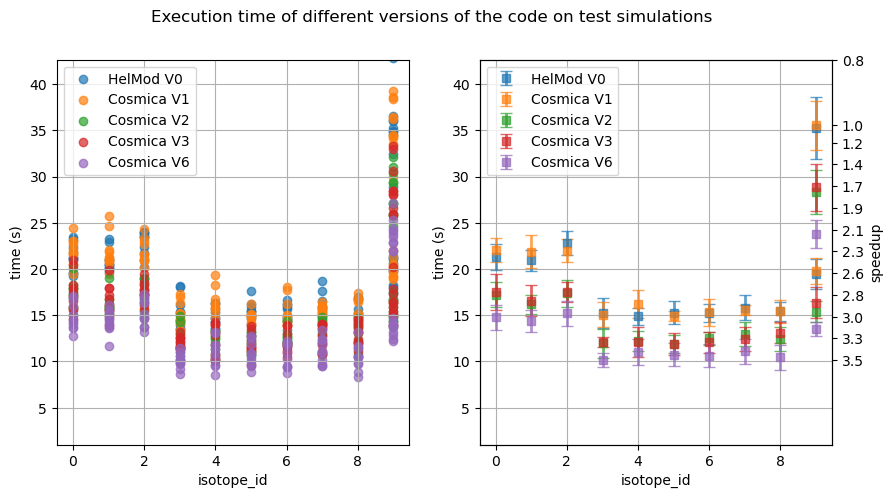

In [3]:
# Fit the two data sample with possible functions
def func1(x, a, b, c):
    return a*(x-c)+b

def func2(x, a, b, c):
    return a*(x-c)**2 +b

fit_func_list = [{"name": "linear", "func": func1, "params": ["a", "b", "c"]}]
                 #{"name": "quadratic", "func": func2, "params": ["a", "b", "c"]}]


popts = np.empty((len(isotopes_list), len(fit_func_list)))
pcovs = np.empty((len(isotopes_list), len(fit_func_list)))

complete_exe_time = np.array([])

i = 0

fig1, ax1 = plt.subplots(1,2, figsize=(10, 5))

for version_id in range(len(exe_times_dicts)):

    # Scattering plots
    ax1[0].scatter(exe_times_dicts[version_id]["isotope_id"], exe_times_dicts[version_id]["time"], label=exe_times_dicts[version_id]["name"]+" "+exe_times_dicts[version_id]["version"], marker="o", alpha=0.7)

    '''# Fitting functions
    for fit_func_id in range(len(fit_func_list)):
        function = fit_func_list[fit_func_id]
        popt, pcov = curve_fit(function["func"], exe_times_dicts[version_id]["isotope_id"], exe_times_dicts[version_id]["time"])
        # popts[version_id][fit_func_id] = {"params": popt}
        # pcovs[version_id][fit_func_id] = {"params": pcov}
        fit_name = function["name"]
        GPU_name = exe_times_dicts[version_id]["name"]
        ax1[0].plot(exe_times_dicts[version_id]["isotope_id"], function["func"](exe_times_dicts[version_id]["isotope_id"], *popt), '--', label=f'{fit_name} fit {GPU_name}')
        print(f"Best fitting parameters for {fit_name} function on {GPU_name} board:")
        for par_id in range(len(function["params"])):
            locsal_params = function["params"]
            print(f"{locsal_params[par_id]}={popt[par_id]:.2f}")'''

    # Everage + error bars plots
    exe_mean = np.average(exe_times_dicts[version_id]["isotope_id"].reshape(-1, run_rep), axis=1)
    exe_time_mean = np.average(exe_times_dicts[version_id]["time"].reshape(-1, run_rep), axis=1)
    exe_time_errors = np.std(exe_times_dicts[version_id]["time"].reshape(-1, run_rep), axis=1)
    ax1[1].errorbar(exe_mean, exe_time_mean, yerr=exe_time_errors, label=exe_times_dicts[version_id]["name"]+" "+exe_times_dicts[version_id]["version"], fmt='s', linewidth=2, capsize=4, alpha=0.7)
    
    for fit_func_id in range(len(fit_func_list)):
        function = fit_func_list[fit_func_id]
        popt, pcov = curve_fit(function["func"], exe_times_dicts[version_id]["isotope_id"], exe_times_dicts[version_id]["time"])
        # popts[version_id][fit_func_id] = {"params": popt}
        # pcovs[version_id][fit_func_id] = {"params": pcov}
        fit_name = function["name"]
        GPU_name = exe_times_dicts[version_id]["name"]
        '''ax1[1].plot(exe_times_dicts[version_id]["isotope_id"], function["func"](exe_times_dicts[version_id]["isotope_id"], *popt), '--', label=f'{fit_name} fit {GPU_name}')
        print(f"Best fitting parameters for {fit_name} function on {GPU_name} board:")
        for par_id in range(len(function["params"])):
            locsal_params = function["params"]
            print(f"{locsal_params[par_id]}={popt[par_id]:.2f}")'''
        
    complete_exe_time = np.append(complete_exe_time, exe_time_mean)
    
max = np.max(complete_exe_time)
min = np.min(complete_exe_time)
ax2 = ax1[1].twinx()
tot_time = np.sort(complete_exe_time)
speedup_scale = np.round(max/tot_time, 2)
ax2_values = np.linspace(1, np.max(speedup_scale), len(speedup_scale))
ax2_ticks = np.append(np.linspace(min, max, len(speedup_scale)), max+0.2*max)
ax2_values = np.round(np.append(np.array([max/(max+0.2*max)]), ax2_values), 1)
ax2.set_yticks(np.sort(np.append(ax2_ticks[::5], max)), labels=np.flip(np.sort(np.append(ax2_values[::5], 1))))
ax2.set_ylim(1, max+0.2*max)
ax2.set_ylabel("speedup")

# Show of the plot and set of its box
fig1.suptitle("Execution time of different versions of the code on test simulations")
ax1[0].set_xlabel("isotope_id")
ax1[0].set_ylabel("time (s)")
ax1[0].set_ylim(1, max+0.2*max)
ax1[0].legend()
ax1[0].grid()
ax1[1].set_xlabel("isotope_id")
ax1[1].set_ylabel("time (s)")
ax1[1].set_ylim(1, max+0.2*max)
ax1[1].legend()
ax1[1].grid()

save_name = exe_times_dicts[version_id]["name"].split("_")[0]
fig1.show()

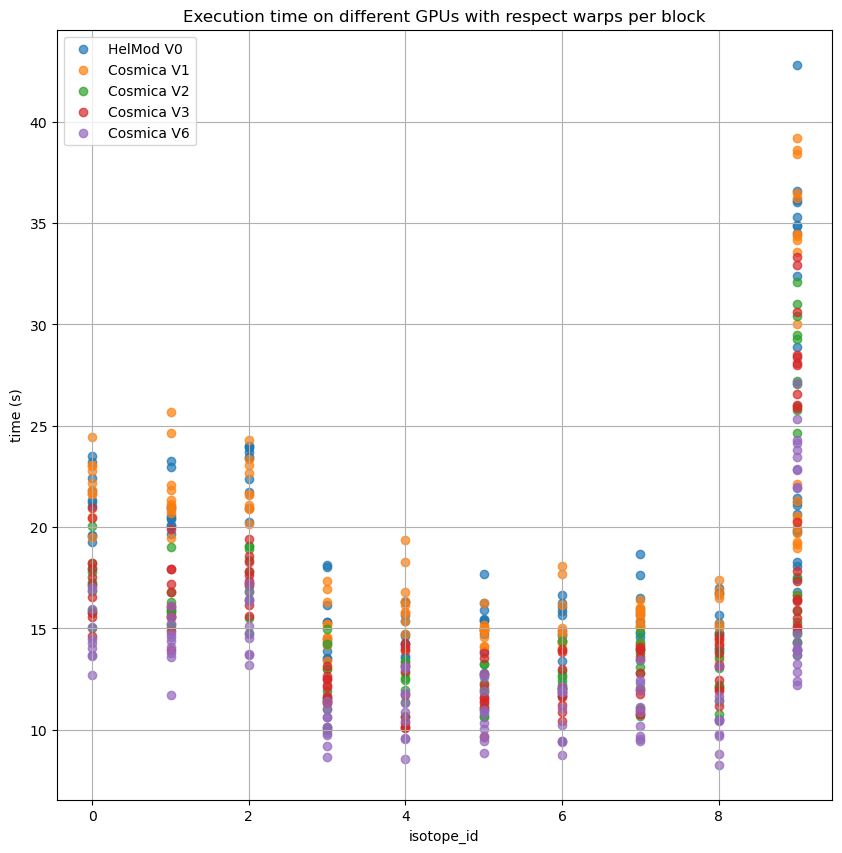

In [4]:
fig2, ax3 = plt.subplots(figsize=(10, 10))

# Compare between Cosmica versions and HelMod for test elements
for version_id in range(len(exe_times_dicts)):
    ax3.scatter(exe_times_dicts[version_id]["isotope_id"], exe_times_dicts[version_id]["time"], label=exe_times_dicts[version_id]["name"]+" "+exe_times_dicts[version_id]["version"], marker="o", alpha=0.7)

# Show of the plot and set of its box
ax3.set_title("Execution time on different GPUs with respect warps per block")
ax3.set_xlabel("isotope_id")
ax3.set_ylabel("time (s)")
ax3.legend()
ax3.grid()
fig2.savefig(f"{local_dir}/test_plots/SimExeTimes_compare_codes_scatter.pdf")
fig2.savefig(f"{local_dir}/test_plots/SimExeTimes_compare_codes_scatter.jpg")
fig2.show()

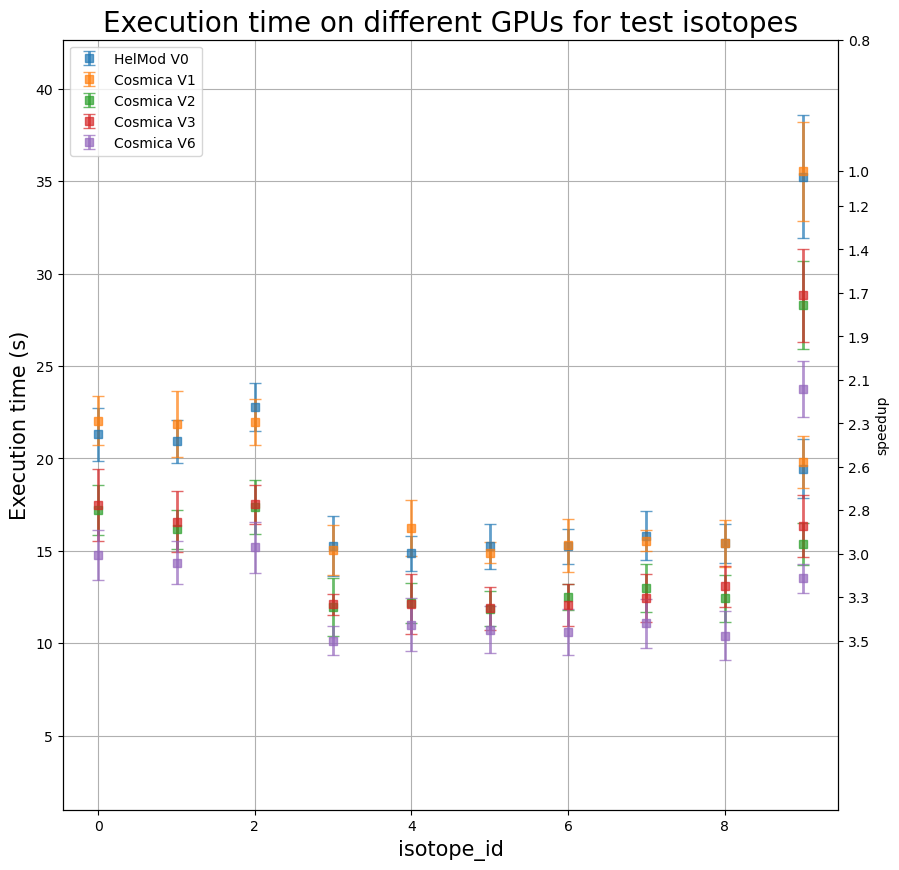

In [5]:
fig2, ax3 = plt.subplots(figsize=(10, 10))

complete_exe_time = np.array([])

# Compare between Cosmica versions and HelMod for test elements
for version_id in range(len(exe_times_dicts)):
    # Everage + error bars plots
    exe_mean = np.average(exe_times_dicts[version_id]["isotope_id"].reshape(-1, run_rep), axis=1)
    exe_time_mean = np.average(exe_times_dicts[version_id]["time"].reshape(-1, run_rep), axis=1)
    exe_time_errors = np.std(exe_times_dicts[version_id]["time"].reshape(-1, run_rep), axis=1)
    ax3.errorbar(exe_mean, exe_time_mean, yerr=exe_time_errors, label=exe_times_dicts[version_id]["name"]+" "+exe_times_dicts[version_id]["version"], fmt='s', linewidth=2, capsize=4, alpha=0.7)
    
    complete_exe_time = np.append(complete_exe_time, exe_time_mean)
    
max = np.max(complete_exe_time)
min = np.min(complete_exe_time)
ax2 = ax3.twinx()
tot_time = np.sort(complete_exe_time)
speedup_scale = np.round(max/tot_time, 2)
ax2_values = np.linspace(1, np.max(speedup_scale), len(speedup_scale))
ax2_ticks = np.append(np.linspace(min, max, len(speedup_scale)), max+0.2*max)
ax2_values = np.round(np.append(np.array([max/(max+0.2*max)]), ax2_values), 1)
ax2.set_yticks(np.sort(np.append(ax2_ticks[::5], max)), labels=np.flip(np.sort(np.append(ax2_values[::5], 1))))
ax2.set_ylim(1, max+0.2*max)
ax2.set_ylabel("speedup")

# Show of the plot and set of its box
ax3.set_title("Execution time on different GPUs for test isotopes", fontsize=20)
ax3.set_xlabel("isotope_id", fontsize=15)
ax3.set_ylabel("Execution time (s)", fontsize=15)
ax3.set_ylim(1, max+0.2*max)
ax3.legend()
ax3.grid()

fig2.savefig(f"{local_dir}/test_plots/SimExeTimes_compare_codes.pdf")
fig2.savefig(f"{local_dir}/test_plots/SimExeTimes_compare_codes.jpg")
fig2.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

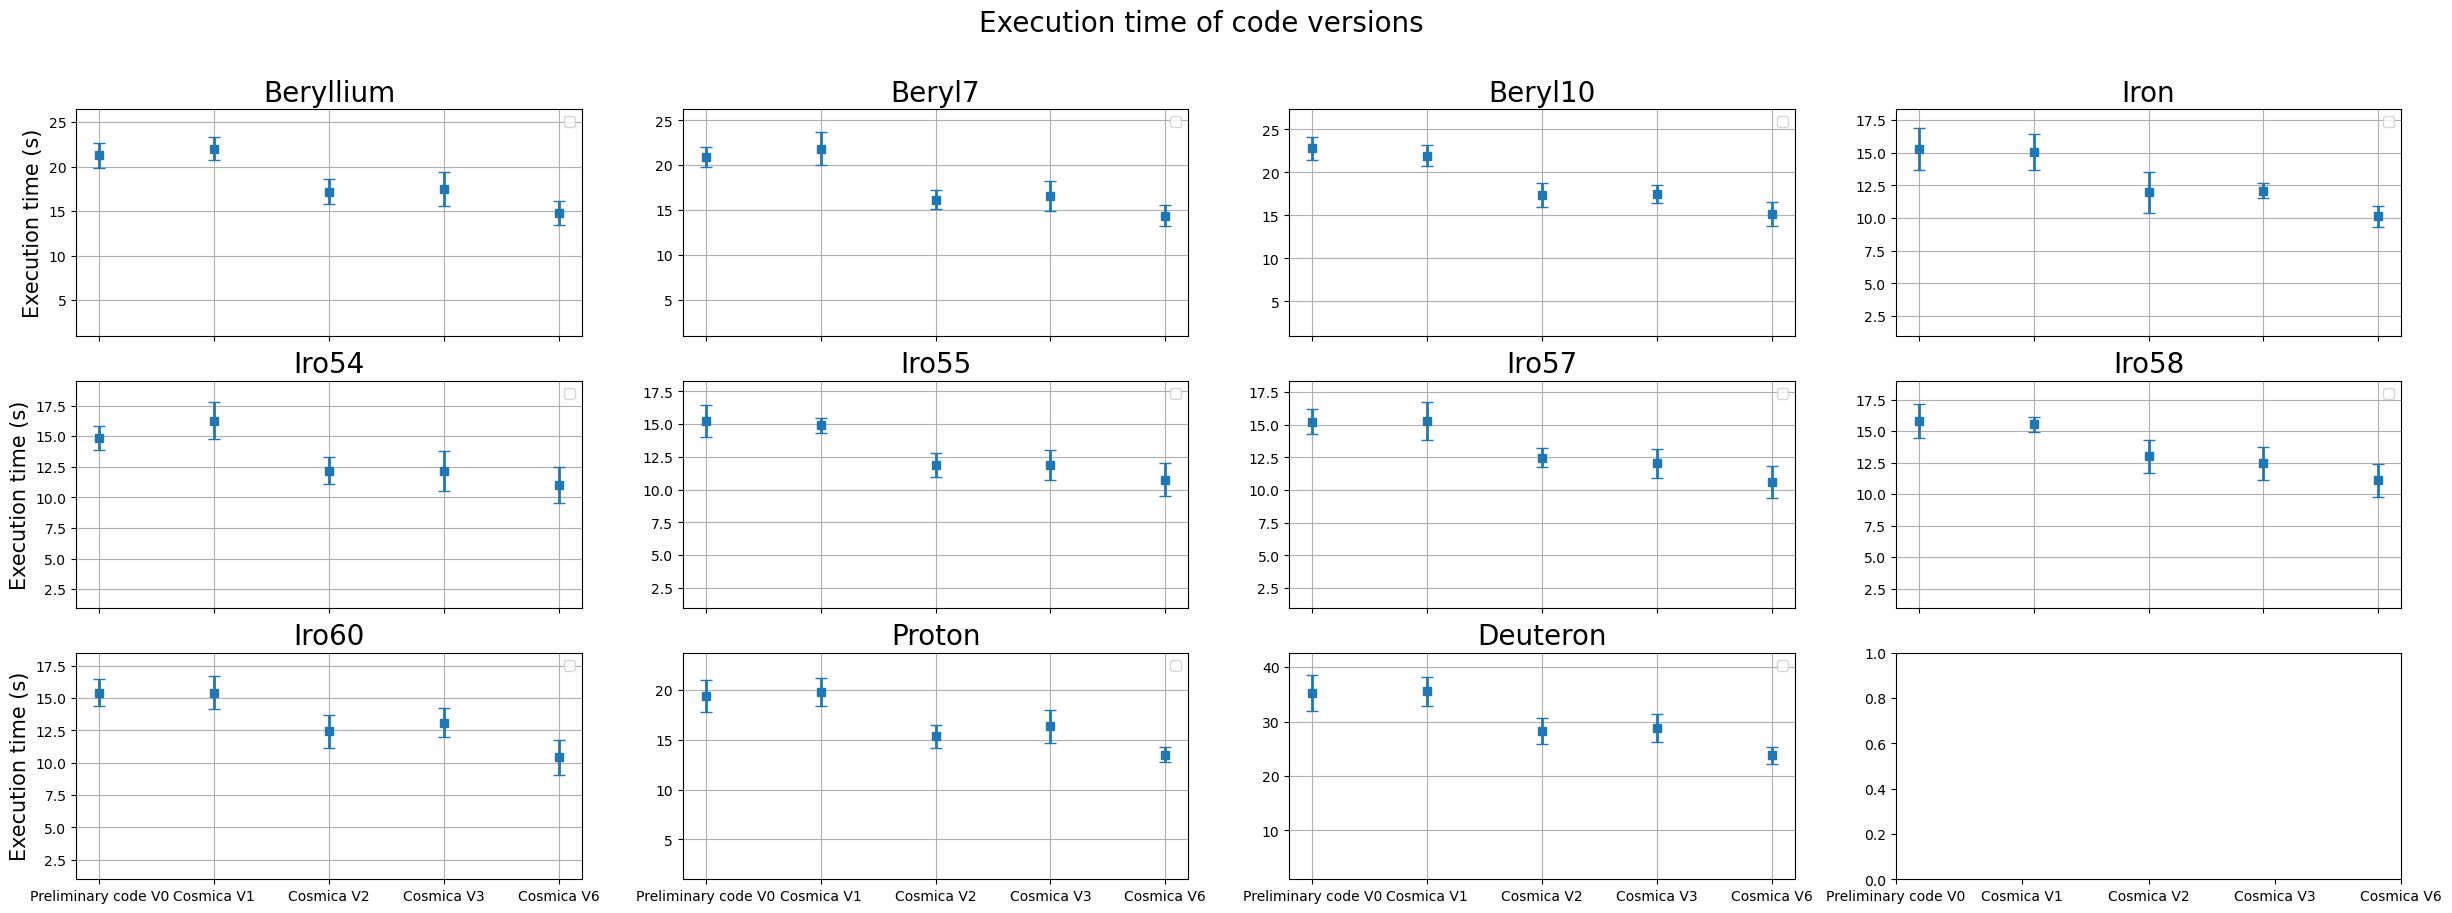

In [6]:
row = int(np.sqrt(len(isotopes_list)))
col = len(isotopes_list)//row
if len(isotopes_list)%row!=0:
    col += 1
fig5, ax6 = plt.subplots(row,col, figsize=(30, 10))

code_labels = ["Preliminary code V0", "Cosmica V1", "Cosmica V2", "Cosmica V3", "Cosmica V6"]
            # "Preliminary code V0", "Cosmica V1", "Cosmica V2", "Cosmica V3", "Cosmica V6"

for isotope_id in range(len(isotopes_list)):

    complete_exe_time = np.array([])
    complete_exe_error = np.array([])

    # Compare between Cosmica and HelMod on A30 and A40 boards
    for version_id in range(len(exe_times_dicts)):

        # Compute the average and standard deviation between multiple runs with the same WpB
        exe_time_mean_best = np.average(exe_times_dicts[version_id]["time"].reshape(-1, run_rep), axis=1)[isotope_id]

        exe_time_errors = np.std(exe_times_dicts[version_id]["time"].reshape(-1, run_rep), axis=1)[isotope_id]
        complete_exe_time = np.append(complete_exe_time, exe_time_mean_best)
        complete_exe_error = np.append(complete_exe_error, exe_time_errors)

    ax6[isotope_id//col, isotope_id%col].errorbar(np.arange(len(complete_exe_time)), complete_exe_time, yerr=complete_exe_error, fmt='s', linewidth=2, capsize=4)

    # Show of the plot and set of its box
    ax6[isotope_id//col, isotope_id%col].set_title(f"{isotopes_list[isotope_id]}", fontsize=20)
    ax6[isotope_id//col, isotope_id%col].set_xticks(np.arange(len(complete_exe_time)), labels="")
    ax6[-1, isotope_id%col].set_xticks(np.arange(len(complete_exe_time)), labels=code_labels)
    ax6[isotope_id//col, 0].set_ylabel("Execution time (s)", fontsize=15)
    max = np.max(complete_exe_time)
    ax6[isotope_id//col, isotope_id%col].set_ylim(1, max+0.2*max)
    ax6[isotope_id//col, isotope_id%col].legend()
    ax6[isotope_id//col, isotope_id%col].grid()

fig5.suptitle(f"Execution time of code versions", fontsize=20)
fig5.show()

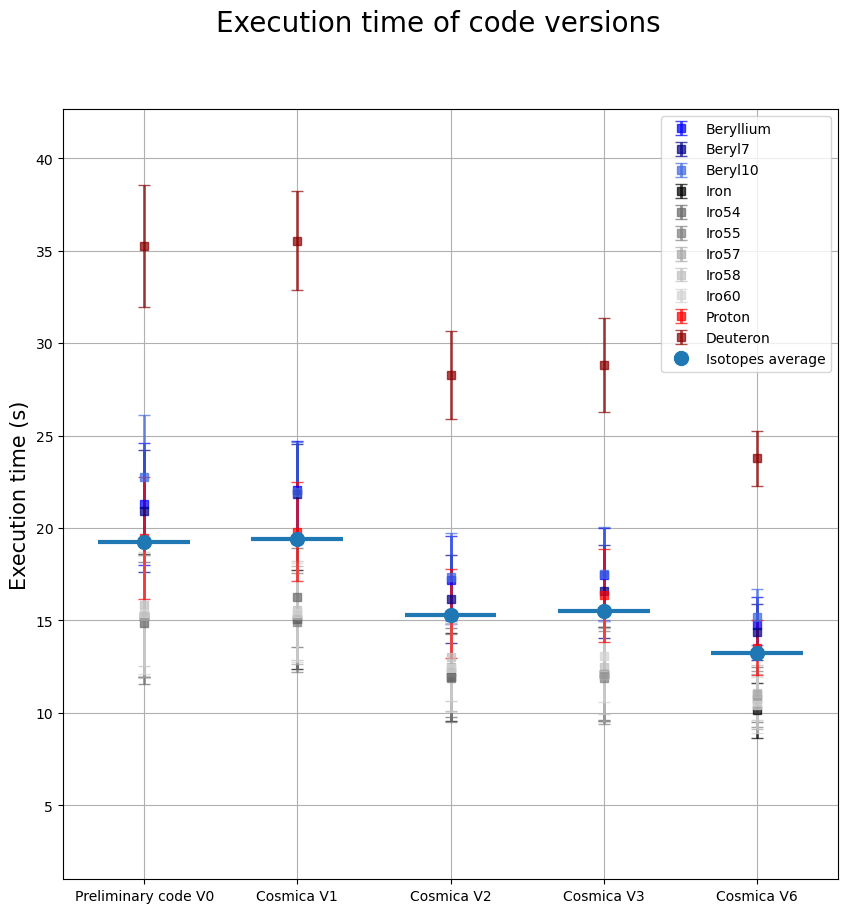

In [7]:
fig5, ax6 = plt.subplots(figsize=(10, 10))

code_labels = ["Preliminary code V0", "Cosmica V1", "Cosmica V2", "Cosmica V3", "Cosmica V6"]
iso_color = ['blue', 'darkblue', 'royalblue', 'black', 'dimgrey', 'grey', 'darkgrey', 'silver', 'lightgrey', 'red', 'darkred']
            # "Beryllium","Beryl7","Beryl10", "Iron","Iro54","Iro55","Iro57","Iro58","Iro60", "Proton","Deuteron", "Positron"

complete_exe_time = np.array([])
complete_mean_exe_time = np.array([])

for isotope_id in range(len(isotopes_list)):

    exe_time = np.array([])
    exe_error = np.array([])

    # Compare between Cosmica and HelMod on A30 and A40 boards
    for version_id in range(len(exe_times_dicts)):

        # Compute the average and standard deviation between multiple runs with the same WpB
        exe_time_mean_best = np.average(exe_times_dicts[version_id]["time"].reshape(-1, run_rep), axis=1)[isotope_id]
        exe_time_errors = np.std(exe_times_dicts[version_id]["time"].reshape(-1, run_rep), axis=1)[isotope_id]
        exe_time = np.append(exe_time, exe_time_mean_best)
        exe_error = np.append(exe_error, exe_time_errors)

    ax6.errorbar(np.arange(len(exe_time)), exe_time, yerr=complete_exe_error, fmt='s', color=iso_color[isotope_id], linewidth=2, capsize=4, label=isotopes_list[isotope_id], alpha=0.7)
    complete_exe_time = np.append(complete_exe_time, exe_time)

# Show of the plot and set of its box
for version_id in range(len(exe_times_dicts)):
    mean_exe_time = np.mean(exe_times_dicts[version_id]["time"])
    complete_mean_exe_time = np.append(complete_mean_exe_time, mean_exe_time)

ax6.errorbar(np.arange(len(complete_mean_exe_time)), complete_mean_exe_time, yerr=0, xerr=0.3, fmt='o', markersize=10, linewidth=3, label="Isotopes average")
ax6.set_xticks(np.arange(len(code_labels)), labels=code_labels)
ax6.set_ylabel("Execution time (s)", fontsize=15)
max = np.max(complete_exe_time)
ax6.set_ylim(1, max+0.2*max)
ax6.legend()
ax6.grid()

fig5.suptitle(f"Execution time of code versions", fontsize=20)
fig5.savefig(f"{local_dir}/test_plots/SimExeTimes_compare_best.pdf")
fig5.savefig(f"{local_dir}/test_plots/SimExeTimes_compare_best.jpg")
fig5.show()